# The Hampy field viewer

The code now comes with a couple of python viewers.  This notebooks shows some examples of how to visualize the field or alternatively the scalar thermal electron input grid.  

First, set your PYTHONPATH variable to the hampy directory, e.g.,

setenv PYTHONPATH /path/to/hammurabi/hampy/

or equivalent.

Import the necessary libraries

In [2]:
import hampy
import healpy as hp
import numpy as np
from view_field import view_field
import matplotlib
from pylab import cm
%matplotlib inline
#  Healpy's mollview seems to change color tables on different systems
#   which is annoying.  Set it explicitly:
cmap=cm.get_cmap('jet')
cmap.set_under('w')

# Visualizing Galactic magnetic field models:

First, let's run an example that uses one of the built-in, analytic Galactic models, the Jansson & Farray (2012) model, integrates the whole sky, and also writes a box containing the field as a grid

In [3]:
#  Uncomment this as needed to clean up previous runs:
#ham.cleanup()
ham=hampy.Hampy(custom_parameters={
            "B_field_type":7, 
            "B_field_nx":256, 
            "B_field_ny":256, 
            "B_field_nz":51, 
            "B_field_lx":40, 
            "B_field_ly":40, 
            "B_field_lz":8, 
            "B_field_total_out":"test.out/jf12_bfield.bin"
        })
ham.call()

.......................................

0

Let's plot the Q to compare to JF12 Fig. 2 (though this uses a different CRE model, so the normalization is different):

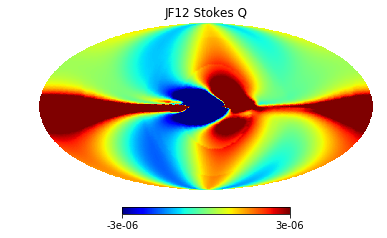

In [4]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
maps=ham.get_observables()
#jf12_pi=np.sqrt(maps['Qs']**2 + maps['Us']**2)
#hp.mollview(jf12_pi,min=0,max=1e-5)
hp.mollview(maps['Qs'],title="JF12 Stokes Q",hold=True,min=-3e-6,max=3e-6,cmap=cmap)

Now let's look at the magnetic field.  The dimensions are as given to hammurabi, and we need to tell the viewer that the coordinate system origin is in the middle of the (Galacto-centric in this case) box.  We also want to add arrows to show the field direction.  The bscale is the average length of the arrows in units of the plot width.  The bskip is the number of bins to skip, i.e. bskip=8 means put an arrow on every 8th bin.  

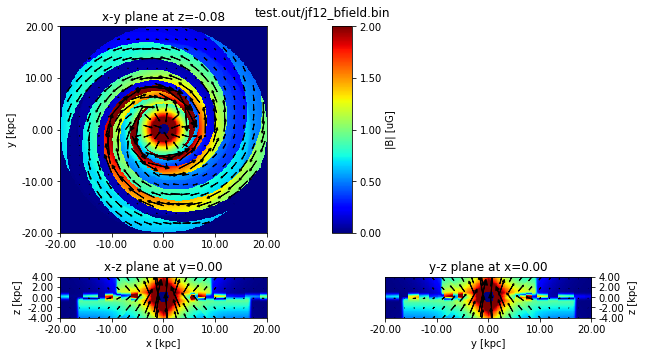

In [5]:
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
view_field(
    infile="test.out/jf12_bfield.bin",
    Ndims=[256,256,51],  # The dimensions, as given to hammurabi above
    Ldims=[40,40,8],     # The physical dimensions to display on the axis
    origin=[20,20,4],    # The location of the origin in these units
    crange=[0,2],        # The color scale's min and max
    bscale=0.1,         # The maximum length of the arrow in units of the plot size
    bskip=12             # How many bins to skip between arrows.
)

# Input, output, and non-Galactic fields

Let's run another example hammurabi run that reads a coherent field from an input grid, adds a random component, and writes the total field out in before performing the integration through the box placed some distance from the observer, resulting in a simulation of a small observed patch written as a list instead of a map:

In [6]:
ham=hampy.Hampy(custom_parameters="test/params15.txt")  # No random component in params15.txt
ham.call(custom_parameters={"B_field_do_random":"T"})   #  So we add it at runtime.

..............................

0

In this case, the code has written both the total field to test15_btot.bin as well as the observables in the patch observed to test15.txt.  

First, we'll look at the INPUT field used:

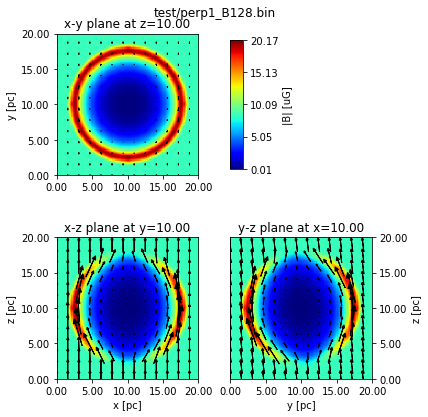

In [8]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
view_field(infile='test/perp1_B128.bin',  #  The input field
           Ndims=[128,128,128],  #  The dimensions of the box given, in bins
           Ldims=[20,20,20],     #  The physical dimensions of the box
           unit='[pc]',          #  The units of those dimensions (kpc by default)
           origin=[0,0,0],       #  The origin of the coordinate system (which by default is the Galactic center)
           bscale=0.1,         #  In this case, the B projected onto the x-y plane is very small.
           bskip=10
           )

And now the result written by hammurabi, which added a random component:

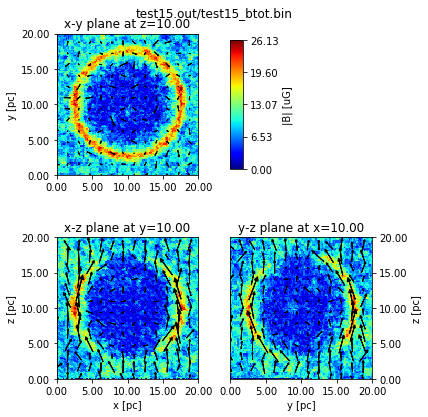

In [10]:
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
view_field(infile='test15.out/test15_btot.bin',
           Ndims=[128,128,128],  #  The dimensions of the box given, in bins
           Ldims=[20,20,20],     #  The physical dimensions of the box
           unit='[pc]',          #  The units of those dimensions (kpc by default)
           origin=[0,0,0],       #  The origin of the coordinate system (which by default is the Galactic center)
           bscale=0.1,        #  Here, the B projected onto the x-y plane is very small, and that scales it.
           bskip=10
           )

# Scalar fields and zooming in
We can also use view_field to look at scalar grids, such as the NE2001 grid:

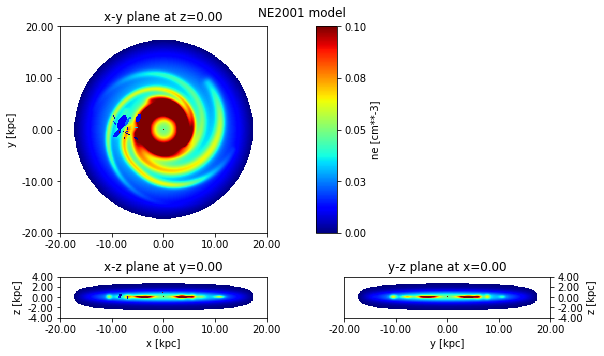

In [12]:
matplotlib.rcParams['figure.figsize'] = (9.0, 5.0)
view_field(infile='test/negrid_n400.bin',
           Ndims=[400,400,80],  #  The dimensions of the box given, in bins
           Ldims=[40,40,8],     #  The physical dimensions of the box
           scalar=True,         #  Specify that it's a vector quantity.
           label='ne [cm**-3]',
           crange=[1e-3,0.1],
           title='NE2001 model'
           )
        

Now suppose the grid covers the whole galaxy, but we want to zoom in on the region around the sun for the plot:

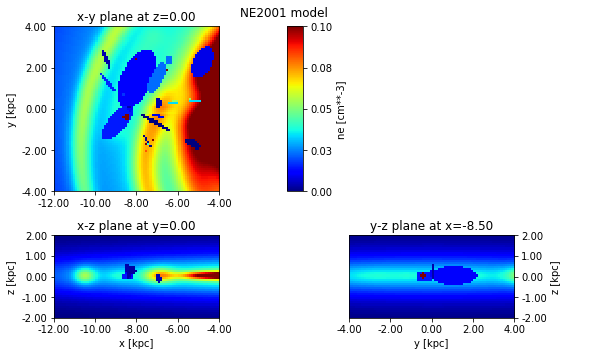

In [13]:
matplotlib.rcParams['figure.figsize'] = (9.0, 5.0)
view_field(infile='test/negrid_n400.bin',
           Ndims=[400,400,80],   #  The dimensions of the box given, in bins
           Ldims=[40,40,8],      #  The physical dimensions of the box
           scalar=True,             #  By default, it assumes a vector.
           label='ne [cm**-3]',  #  The label for the color bar (|B| by default)
           crange=[1e-3,0.1],    #  The range of values to color-code
           title='NE2001 model', #  The top title (by default the file name)
           xrange=[-12,-4],      #  The x-range to zoom in on, in the physical units 
                                 #    defined above with the Ldims and the origin
                                 #    which is by default [20,20,4], which works here.
           yrange=[-4,4],        #  The y-axis zoom.
           zrange=[-2,2],        #  The z-axis zoom.
           slices=[40,200,115]   # By default, the slices are taken through the bin closest 
                                 #    to the middle (200 out of 400, etc.).  This is fine for 
                                 #    the first two slices, but the third, taking it through the middle 
                                 #    of the x-range will be the middle of the Galaxy instead of by the Sun.
                                 #    So instead, we want the *bin* closest to -8.5, which is the 115th bin. 
           )
        

To look at the help for view_field(), just omit any parameters.  Note this shows the command-line context, where for example, you can run it as:

./view_field test.out/jf12_bfield.bin --Ndims=256,256,51 --origin=20,20,4 --crange=0,2 --bscale=0.1 --bskip=12

etc. (The first parameter is mandatory and positional, while the rest are optional, as indicated by the prefix '--'.)

In [14]:
view_field()

usage: __main__.py [-h] [--Ldims LDIMS] [--Ndims NDIMS] [--bcolor BCOLOR]
                   [--bconst] [--bscale BSCALE] [--bskip BSKIP] [--cmap CMAP]
                   [--crange CRANGE] [--dtype DTYPE] [--fcodeB FCODEB]
                   [--fcodeL FCODEL] [--figsize FIGSIZE] [--font FONT]
                   [--label LABEL] [--norm NORM] [--origin ORIGIN]
                   [--outfile OUTFILE] [--scalar] [--slices SLICES]
                   [--title TITLE] [--unit UNIT] [--xrange XRANGE]
                   [--yrange YRANGE] [--zrange ZRANGE]
                   infile

positional arguments:
  infile             Input file name, i.e., a binary data file written by
                     hammurabi containing the 3D field box.

optional arguments:
  -h, --help         show this help message and exit
  --Ldims LDIMS      Comma-separated dimensions of the box [kpc] in the x,y,
                     and z directions, e.g., '--Ldims=40,40,8'. (default: [40,
                     40, 8])
  --Ndi